In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
entire_name_file = "train_data.csv"
entire_data = pd.read_csv(entire_name_file)
# Tách các đặc trưng và nhãn
X = entire_data.drop('label', axis=1)  # Các đặc trưng
y = entire_data['label']  # Nhãn
print(X)
print(y)


# print(y_test.head())

     acceXmin  acceXmax  acceXmean  acceXstd  acceYmin  acceYmax  acceYmean  \
0        0.21      0.45    0.30700  0.044406     -1.58     -0.77  -1.215100   
1        0.18      0.42    0.29195  0.054549     -1.78     -1.11  -1.464250   
2        0.21      0.42    0.29860  0.045985     -1.68     -1.11  -1.449100   
3        0.18      0.43    0.30280  0.061694     -1.81     -1.02  -1.412150   
4        0.20      0.43    0.29070  0.058366     -1.82     -1.11  -1.536600   
..        ...       ...        ...       ...       ...       ...        ...   
144     -1.01      1.00   -0.29865  0.244690     -4.21      0.45  -1.257688   
145     -0.11      0.27    0.06180  0.108858     -1.47     -0.53  -1.082150   
146     -0.52     -0.05   -0.30745  0.101995     -1.95     -1.13  -1.609400   
147     -0.47     -0.10   -0.29715  0.092722     -1.83     -1.16  -1.552850   
148     -0.43     -0.18   -0.31790  0.064820     -1.82     -1.27  -1.592550   

     acceYstd  acceZmin  acceZmax  ...    gXmean   

In [4]:
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# Xác định input_dim
input_dim = X_train.shape[1]
print(input_dim)
# Khởi tạo mô hình Sequential
model = Sequential()
# Giảm số lượng neurons trong các lớp Dense
model.add(Dense(16, input_dim=input_dim, activation='relu'))  # Giảm từ 32 xuống 16
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))  # Giảm từ 16 xuống 8
model.add(Dense(1, activation='sigmoid'))  # Lớp đầu ra

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Hiển thị thông tin mô hình
model.summary()

24


c:\Users\phung\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=500,  # Số lượng epoch có thể thay đổi tùy theo yêu cầu
    batch_size=32,  # Kích thước batch có thể thay đổi tùy theo yêu cầu
    validation_data=(X_test, y_test),  # Dữ liệu kiểm tra để đánh giá mô hình
    verbose=1  # Hiển thị quá trình huấn luyện
)
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3861 - loss: 2.1299 - val_accuracy: 0.1667 - val_loss: 1.5511
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3807 - loss: 1.8322 - val_accuracy: 0.1667 - val_loss: 1.2031
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4970 - loss: 1.6863 - val_accuracy: 0.1667 - val_loss: 0.9103
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5051 - loss: 1.5856 - val_accuracy: 0.3000 - val_loss: 0.6768
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5167 - loss: 1.1413 - val_accuracy: 1.0000 - val_loss: 0.5426
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4880 - loss: 1.1413 - val_accuracy: 0.9333 - val_loss: 0.4667
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5499 - loss: 1.1323 - val_accuracy: 0.9333 - val_loss: 0.4156
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5826 - loss: 1.0806 - val_accuracy: 0.8667 - val_loss: 0.383

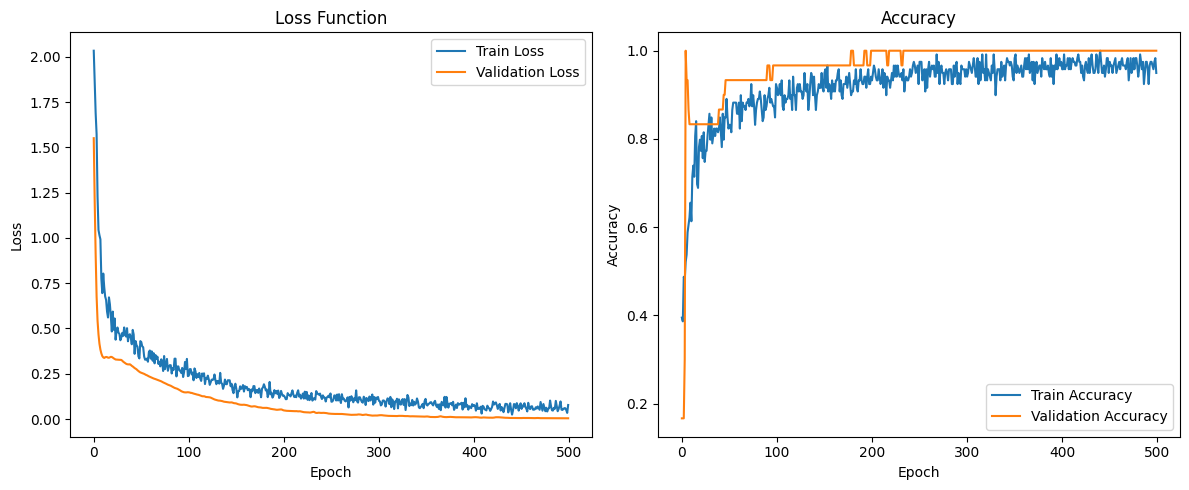

In [6]:
# Vẽ biểu đồ giá trị loss function trong quá trình huấn luyện
plt.figure(figsize=(12, 5))

# Biểu đồ hàm loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Lưu mô hình
model.save('my_model.h5')

In [ ]:
# Tách các đặc trưng và nhãn
X_data_test = data_test.drop('label', axis=1)  # Các đặc trưng
y_data_test = data_test['label']  # Nhãn

# Dự đoán dựa trên dữ liệu kiểm tra (X_test) hoặc dữ liệu mới (X_new)
predictions = model.predict(X_data_test)

# Hoặc nếu bạn có dữ liệu mới để dự đoán
# predictions = model.predict(X_new)

# In kết quả dự đoán
# print(predictions)
# Giả sử predictions là kết quả dự đoán và y_test là nhãn thực tế
# Chuyển đổi nếu cần thiết cho hồi quy (ví dụ: scale các giá trị)
predictions = predictions.flatten()  # Đảm bảo cùng định dạng với y_test nếu cần

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))

# Vẽ giá trị thực tế
plt.plot(y_data_test, label='Giá trị thực tế', color='blue')

# Vẽ giá trị dự đoán
plt.plot(predictions, label='Giá trị dự đoán', color='red')

# Thiết lập tiêu đề và nhãn
plt.title('So sánh giá trị thực tế và dự đoán')
plt.xlabel('Mẫu')
plt.ylabel('Giá trị')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()